# Employee Attrition Prediction

## Getting the system ready

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import joblib


print("Libraries were imported successfully")

Libraries were imported successfully


## Loading and Preparing(cleaning) the Data

In [53]:
def load_and_prepare_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Drop irrelevant columns
    columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate']
    df = df.drop(columns=columns_to_drop)
    
    return df

if __name__ == "__main__":
    # Use the absolute path to the dataset
    df = load_and_prepare_data('D:/MLG382/MLG A2/Employee_Attrition_Prediction/data/HR-Employee-Attrition.csv')
    # Ensure the 'data/' directory exists in the current working directory
    import os
    os.makedirs('data', exist_ok=True)
    df.to_csv('data/prepared_data.csv', index=False)
    print("Prepared data saved to data/prepared_data.csv")

Prepared data saved to data/prepared_data.csv


## Understanding the data

In [54]:
df.head() ##Displays the first 5 rows of the dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [55]:
df.info() ## Displays the summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [56]:
df.describe() ## Displays descriptive statistics of the dataset

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [57]:
df.isnull().sum() ## Displays the total number of null values in each column

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [58]:
df.duplicated().sum() ## Displays the total number of duplicates

np.int64(0)

## Univariate Analysis

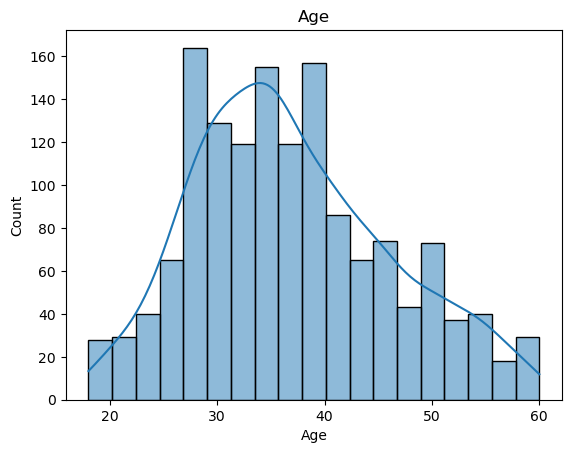

In [59]:
sns.histplot(df['Age'], kde=True)
plt.title('Age')
plt.show()

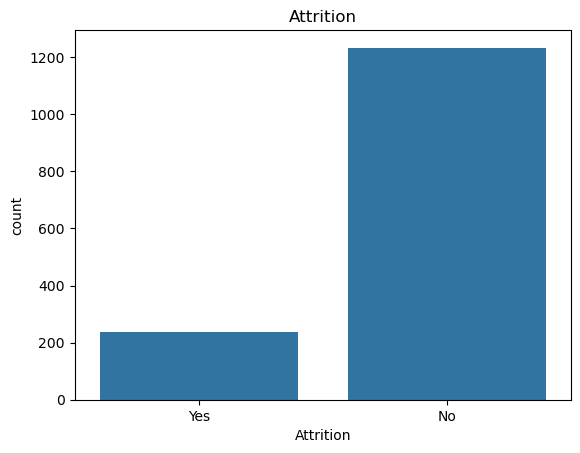

In [60]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition')
plt.show()

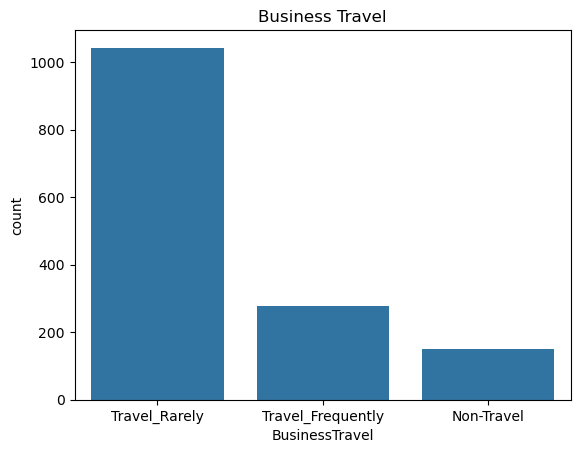

In [61]:
sns.countplot(x='BusinessTravel', data=df)
plt.title('Business Travel')
plt.show()

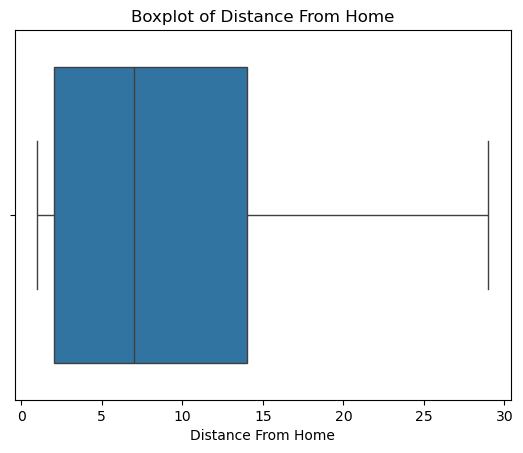

In [62]:
sns.boxplot(x=df['DistanceFromHome'])
plt.title('Boxplot of Distance From Home')
plt.xlabel('Distance From Home')
plt.show()

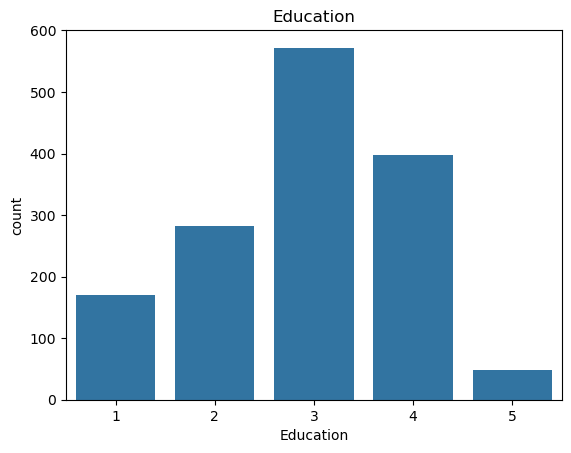

In [63]:
sns.countplot(x='Education', data=df)
plt.title('Education')
plt.show()

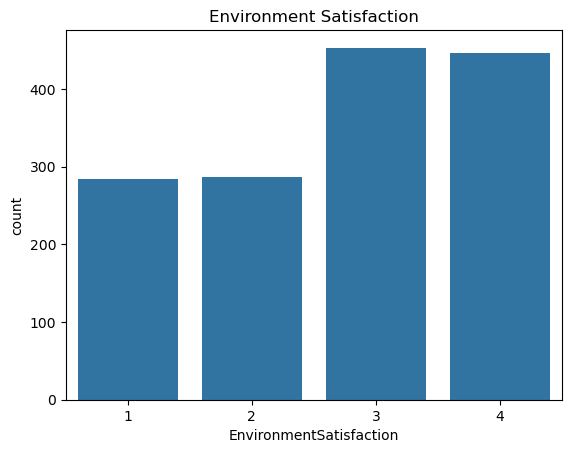

In [64]:
sns.countplot(x='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction')
plt.show()

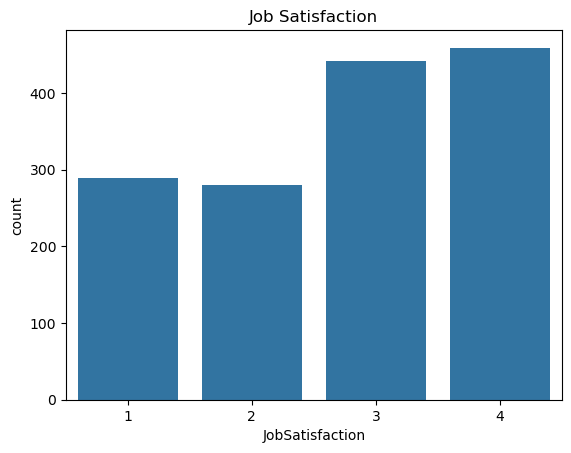

In [65]:
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Job Satisfaction')
plt.show()

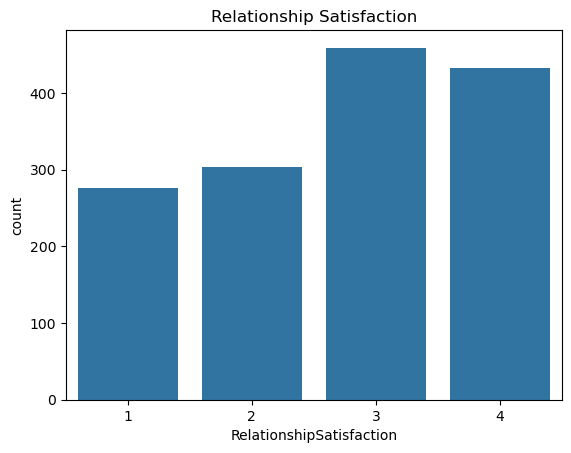

In [66]:
sns.countplot(x='RelationshipSatisfaction', data=df)
plt.title('Relationship Satisfaction')
plt.show()

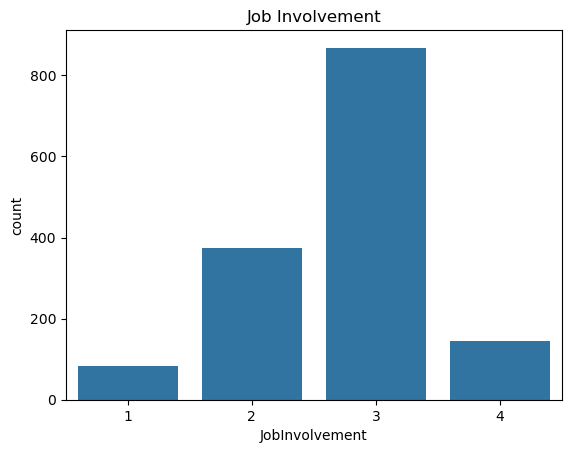

In [67]:
sns.countplot(x='JobInvolvement', data=df)
plt.title('Job Involvement')
plt.show()

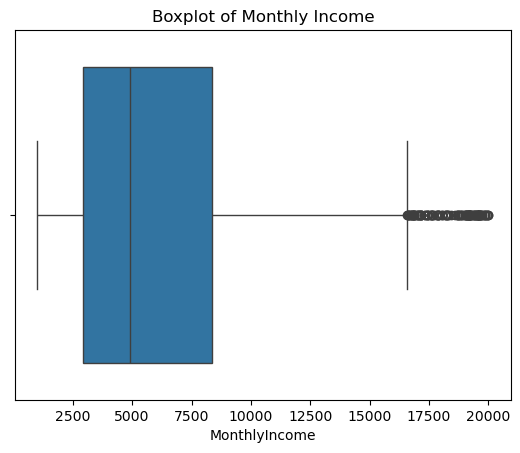

In [68]:
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Boxplot of Monthly Income')
plt.xlabel('MonthlyIncome')
plt.show()

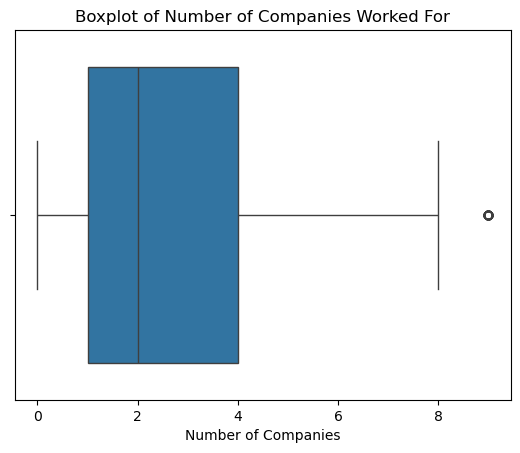

In [69]:
sns.boxplot(x=df['NumCompaniesWorked'])
plt.title('Boxplot of Number of Companies Worked For')
plt.xlabel('Number of Companies')
plt.show()

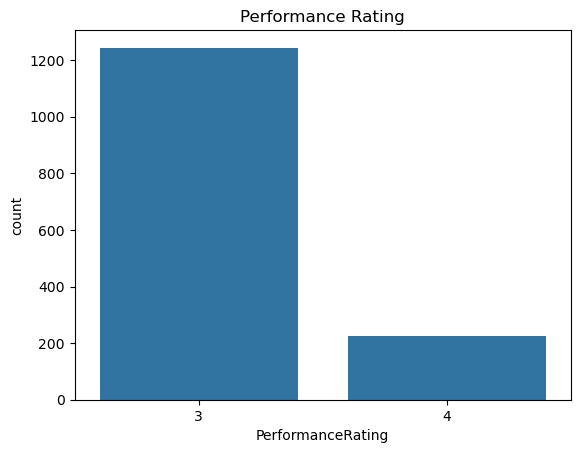

In [70]:
sns.countplot(x='PerformanceRating', data=df)
plt.title('Performance Rating')
plt.show()

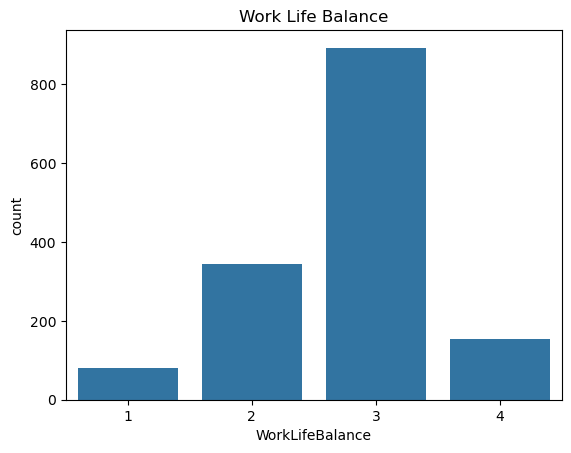

In [71]:
sns.countplot(x='WorkLifeBalance', data=df)
plt.title('Work Life Balance')
plt.show()

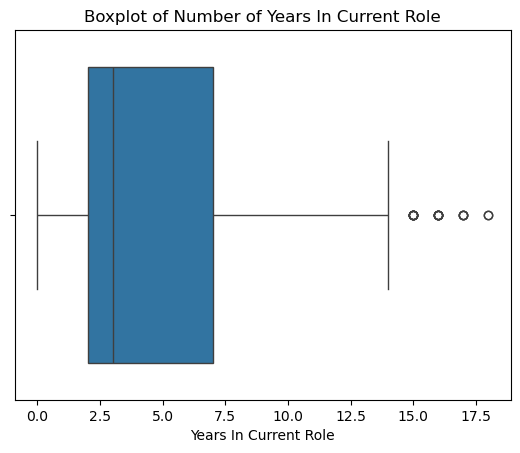

In [72]:
sns.boxplot(x=df['YearsInCurrentRole'])
plt.title('Boxplot of Number of Years In Current Role')
plt.xlabel('Years In Current Role')
plt.show()

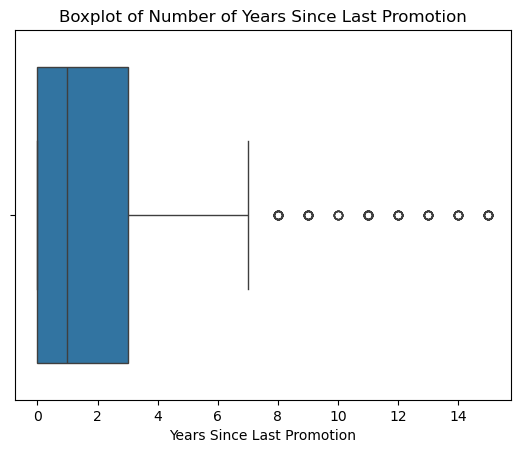

In [73]:
sns.boxplot(x=df['YearsSinceLastPromotion'])
plt.title('Boxplot of Number of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.show()

## Bivariate Analysis

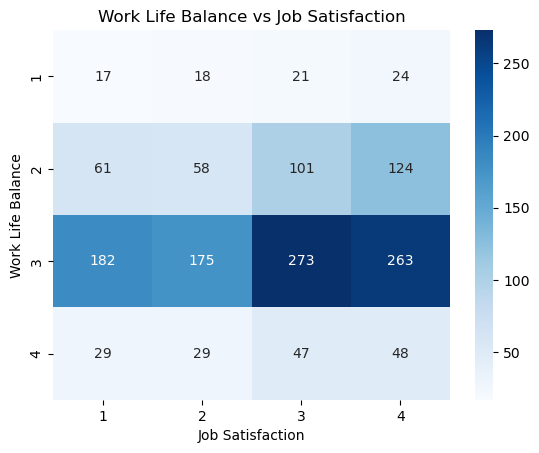

In [74]:
crosstab = pd.crosstab(df['WorkLifeBalance'], df['JobSatisfaction'])

sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Work Life Balance vs Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Work Life Balance")
plt.show()

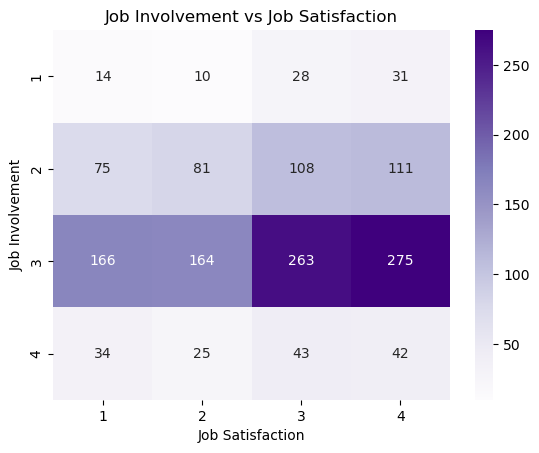

In [75]:
ji_js_crosstab = pd.crosstab(df['JobInvolvement'], df['JobSatisfaction'])

sns.heatmap(ji_js_crosstab, annot=True, fmt="d", cmap="Purples")
plt.title("Job Involvement vs Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Job Involvement")
plt.show()

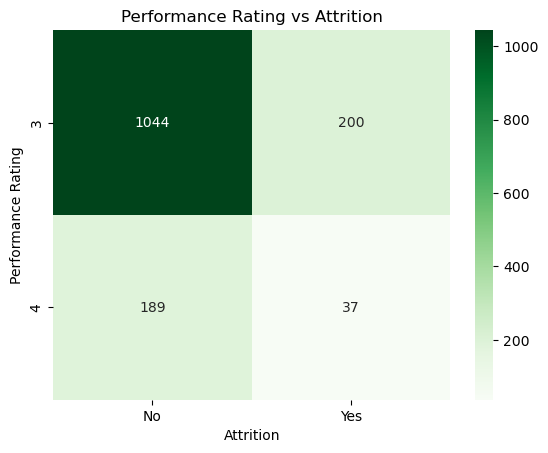

In [76]:
pr_attrition_crosstab = pd.crosstab(df['PerformanceRating'], df['Attrition'])

sns.heatmap(pr_attrition_crosstab, annot=True, fmt="d", cmap="Greens")
plt.title("Performance Rating vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Performance Rating")
plt.show()

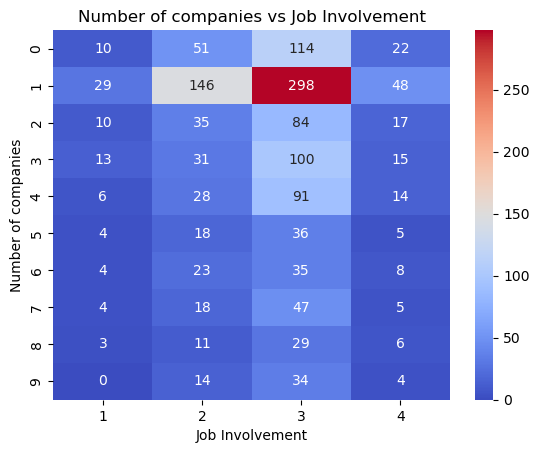

In [77]:
ncw_ji_crosstab = pd.crosstab(df['NumCompaniesWorked'], df['JobInvolvement'])

sns.heatmap(ncw_ji_crosstab, annot=True, fmt="d", cmap="coolwarm")
plt.title("Number of companies vs Job Involvement")
plt.xlabel("Job Involvement")
plt.ylabel("Number of companies")
plt.show()

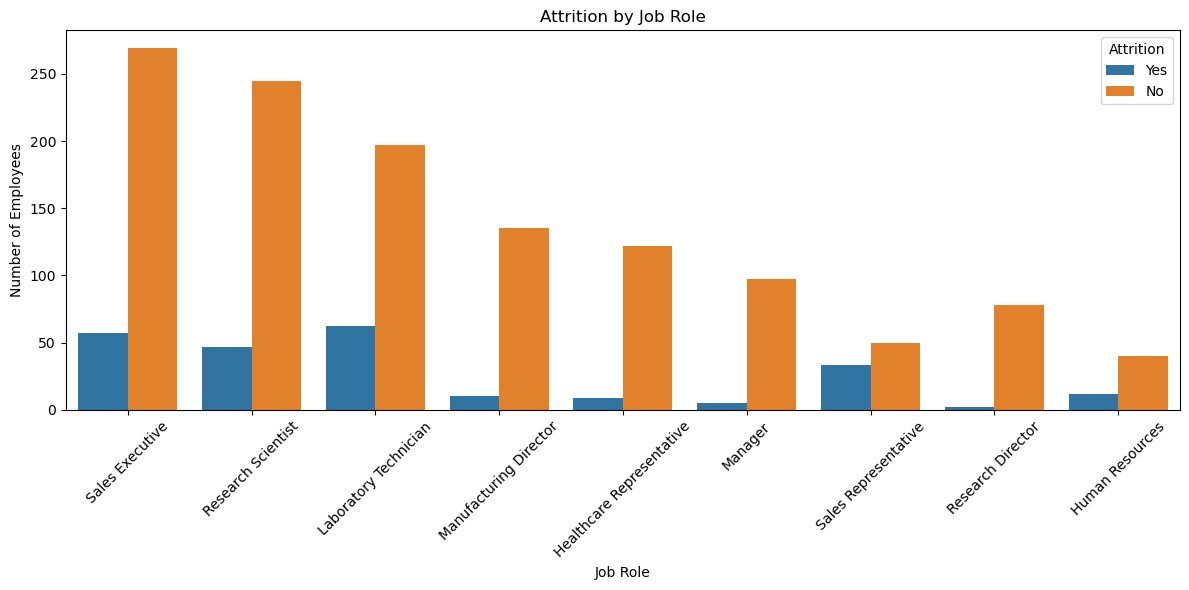

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

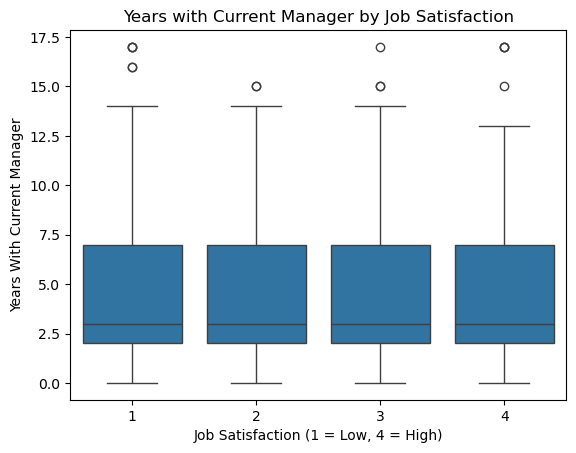

In [79]:
sns.boxplot(x='JobSatisfaction', y='YearsWithCurrManager', data=df)
plt.title("Years with Current Manager by Job Satisfaction")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Years With Current Manager")
plt.show()

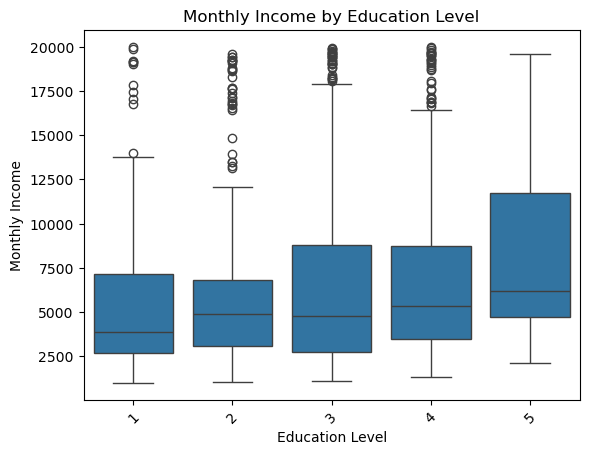

In [80]:
df['EducationLabel'] = df['Education']
sns.boxplot(x='EducationLabel', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.show()

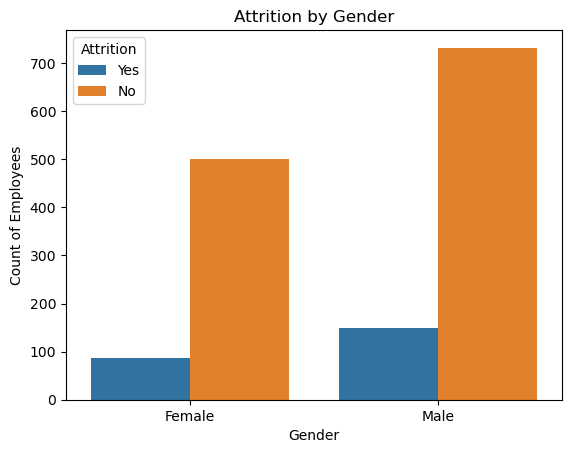

In [81]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Employees")
plt.show()

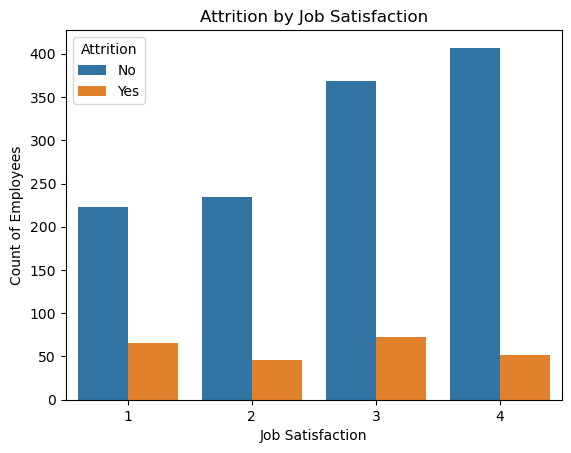

In [82]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Attrition by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count of Employees")
plt.show()

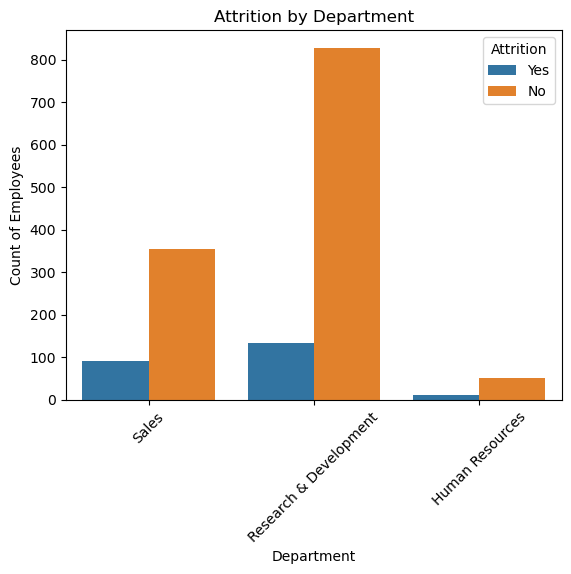

In [83]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count of Employees")
plt.xticks(rotation=45)
plt.show()

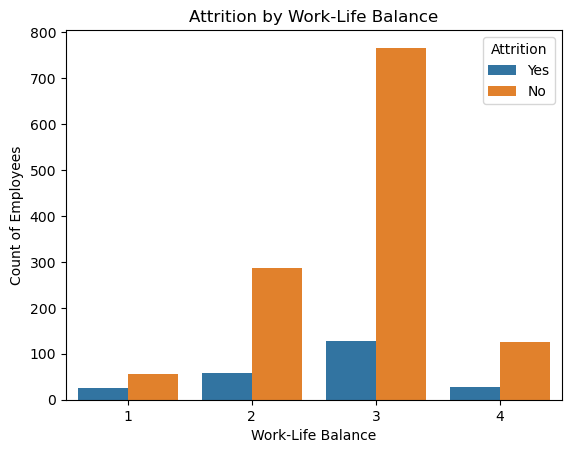

In [84]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title("Attrition by Work-Life Balance")
plt.xlabel("Work-Life Balance")
plt.ylabel("Count of Employees")
plt.show()

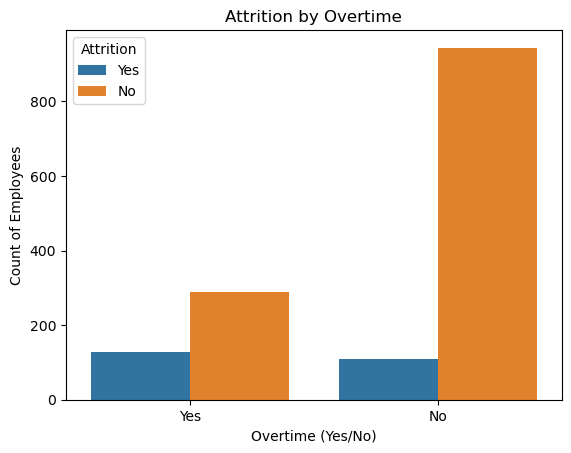

In [85]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by Overtime")
plt.xlabel("Overtime (Yes/No)")
plt.ylabel("Count of Employees")
plt.show()

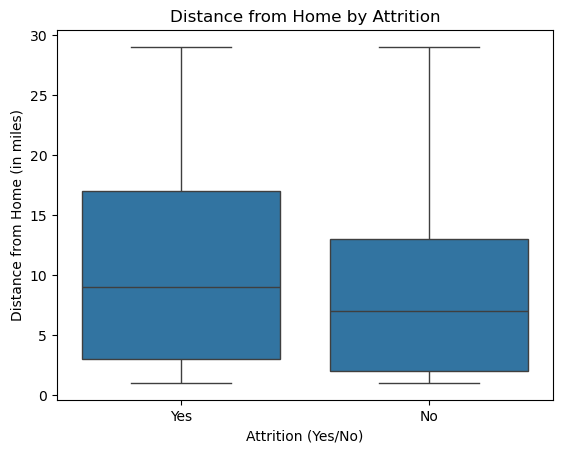

In [86]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title("Distance from Home by Attrition")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Distance from Home (in miles)")
plt.show()

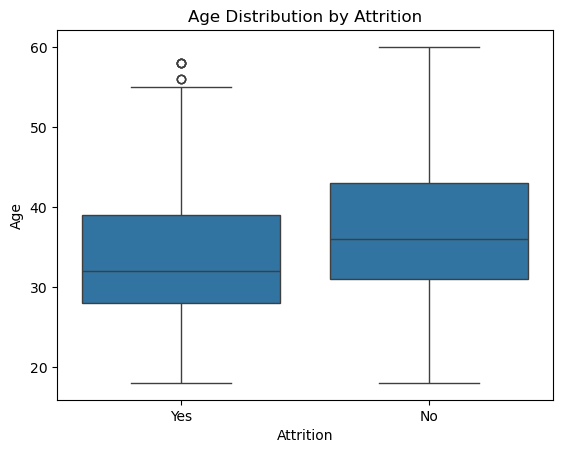

In [87]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

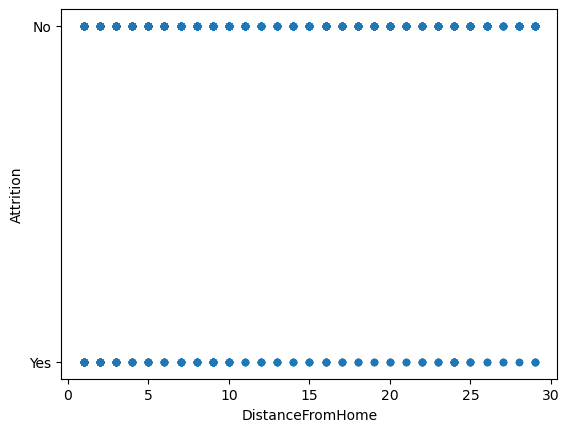

In [88]:
df.plot.scatter(y='Attrition' , x='DistanceFromHome')

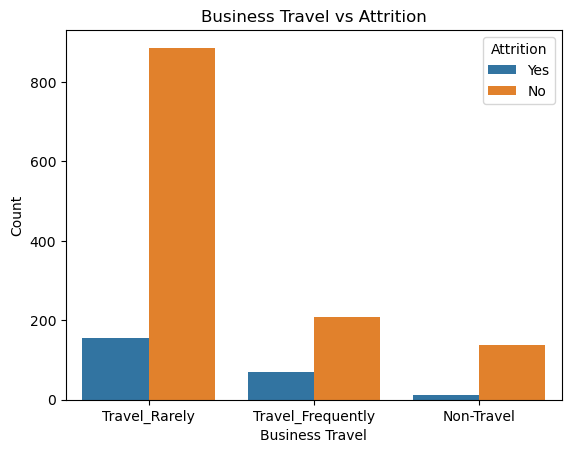

In [89]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Business Travel vs Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

## Cleaning the data

In [90]:
#df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate'], axis=1)
print("Columns after dropping:", df.columns.tolist())

Columns after dropping: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EducationLabel']


In [91]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus','EducationField'], drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Preprocessing 


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

def preprocess_data(df, test_size=0.2, random_state=80):
    # Separate features and target
    output_var = 'Attrition'
    features = df.columns.drop(output_var).tolist()
    X = df[features]
    y = df[output_var]
    
    # Encode categorical variables
    categorical_cols = X.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    # Convert boolean columns to integers
    bool_cols = X.select_dtypes(include='bool').columns
    X[bool_cols] = X[bool_cols].astype(int)

    # Encode target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Scale numerical features
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Apply SMOTE to balance the training set
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    return X_train_balanced, X_test, y_train_balanced, y_test, scaler

if __name__ == "__main__":
    df = pd.read_csv('data/prepared_data.csv')
    x_train_balanced, X_test, y_train_balanced, y_test, scaler = preprocess_data(df)

    print("Preprocessing complete.")
    print("X_train_balanced shape:", x_train_balanced.shape)
    print("X_test shape:", X_test.shape)

Preprocessing complete.
X_train_balanced shape: (1972, 42)
X_test shape: (294, 42)


In [93]:

label_encoder = LabelEncoder()

df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  # 0: No, 1: Yes
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 0: Female, 1: Male
df['OverTime'] = label_encoder.fit_transform(df['OverTime']) # 0: No, 1: Yes
print("Encoded Attrition (Yes=1, No=0):")
print(df['Attrition'].value_counts())

Encoded Attrition (Yes=1, No=0):
Attrition
0    1233
1     237
Name: count, dtype: int64


Attrition Distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64


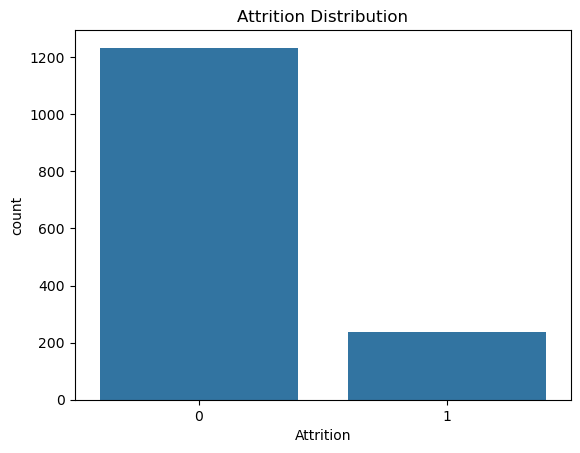

In [94]:
print("Attrition Distribution:")
print(df['Attrition'].value_counts())

sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

In [95]:
#Scaling 

numerical_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager', 'TrainingTimesLastYear', 'NumCompaniesWorked']


scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


joblib.dump(scaler, 'scaler.pkl')  


['scaler.pkl']

In [96]:
df.head() #Verifying if data has been converted 



,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,Travel_Rarely,Sales,-1.010909,2,Life Sciences,2,0,3,...,3,1,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,Travel_Frequently,Research & Development,-0.147150,1,Life Sciences,3,1,2,...,4,4,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,Travel_Rarely,Research & Development,-0.887515,2,Other,4,1,2,...,3,2,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,Travel_Frequently,Research & Development,-0.764121,4,Life Sciences,4,0,3,...,3,3,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,Travel_Rarely,Research & Development,-0.887515,1,Medical,1,1,3,...,3,4,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

In [98]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [99]:

output_var='Attrition' #varible being predicted
features = df.columns.drop(output_var).tolist()
x=df[features]
y=df[output_var]
print(features)


['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)

print(f'Training data: {x_train.shape}, Testing data: {x_test.shape}')

Training data: (1176, 28), Testing data: (294, 28)


In [ ]:
train_df = pd.concat([pd.DataFrame(X_train, columns=X_train.columns), pd.Series(y_train, name='Attrition')], axis=1)
test_df = pd.concat([pd.DataFrame(X_test, columns=X_test.columns), pd.Series(y_test, name='Attrition')], axis=1)
train_df.to_csv('data/train.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

print("Saved train.csv and test.csv to data/ directory.")

Saved train.csv and test.csv to data/ directory.


Attrition
0    986
1    190
Name: count, dtype: int64


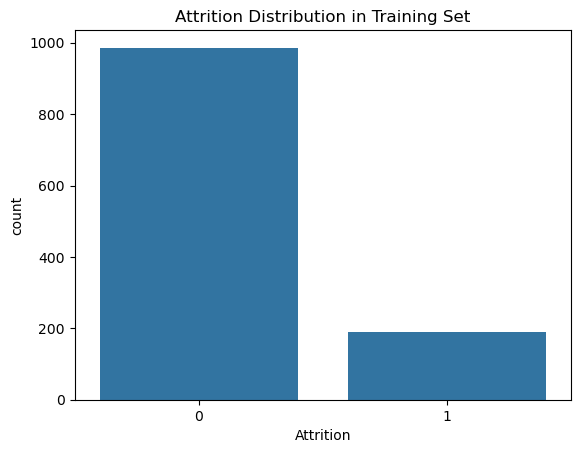

In [ ]:
print(y_train.value_counts())

sns.countplot(x=y_train)
plt.title("Attrition Distribution in Training Set")
plt.show()


In [ ]:

#preprocessing 
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train_balanced.value_counts())


Attrition
0    986
1    986
Name: count, dtype: int64


In [ ]:
output_var='Attrition' #varible being predicted
features = df.columns.drop(output_var).tolist()
print(features)

['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,-3.504377e-17,1.000340,-2.072192,-0.758170,-0.101159,0.665354,2.526886
Attrition,1470.0,1.612245e-01,0.367863,0.000000,0.000000,0.000000,0.000000,1.000000
DistanceFromHome,1470.0,4.350262e-17,1.000340,-1.010909,-0.887515,-0.270544,0.593216,2.444129
Education,1470.0,2.912925e+00,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EnvironmentSatisfaction,1470.0,2.721769e+00,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
Gender,1470.0,6.000000e-01,0.490065,0.000000,0.000000,1.000000,1.000000,1.000000
JobInvolvement,1470.0,2.729932e+00,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.0,2.063946e+00,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000
JobSatisfaction,1470.0,2.728571e+00,1.102846,1.000000,2.000000,3.000000,4.000000,4.000000
MonthlyIncome,1470.0,-4.471102e-17,1.000340,-1.167343,-0.763209,-0.336552,0.398625,2.867626


In [121]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Save the model and scaler
joblib.dump(model, "artifacts/logistic_regression_model.pkl")
joblib.dump(scaler, "artifacts/scaler.pkl")

ValueError: could not convert string to float: 'Travel_Rarely'

In [ ]:
import joblib
import pandas as pd
import os

model_path = "artifacts/logistic_regression_model.pkl"
if os.path.exists(model_path):
    model = joblib.load(model_path)
else:
    print(f"Error: The file {model_path} does not exist.")

expected_features = ["Age", "MonthlyIncome", "YearsAtCompany", "JobRole_Sales", "JobRole_Research", "OverTime_Yes", "OverTime_No"]

expected_features = model.feature_names_in_

# Create a dictionary with all expected features set to 0
input_dict = {feature: 0 for feature in expected_features}

# Fill the known inputs
input_dict["Age"] = age
input_dict["MonthlyIncome"] = income
input_dict["YearsAtCompany"] = years

# Handle one-hot encoding safely for JobRole
for role in job_roles:
    jobrole_col = f"JobRole_{role}"
    if role == input_dict["JobRole"]:
        input_dict[jobrole_col] = 1

# Handle one-hot encoding safely for OverTime
overtime_col = f"OverTime_{overtime}"
if overtime_col in input_dict:
    input_dict[overtime_col] = 1

# Create a single-row DataFrame
input_df = pd.DataFrame([input_dict])

# Scale only numerical columns (Age, MonthlyIncome, YearsAtCompany)
numerical_cols = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Make sure to apply scaling only to numerical columns and leave the rest as they are
input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

# Predict
prediction = model.predict(input_df)[0]
prob = model.predict_proba(input_df)[0]

# Output
message = (
    f"⚠️ Attrition Likely (Confidence: {prob[1]:.2%})"
    if prediction == 1
    else f"✅ Employee Likely to Stay (Confidence: {prob[0]:.2%})"
)

# Example of returning or logging the result
print(message)


Error: The file artifacts/logistic_regression_model.pkl does not exist.


NameError: name 'model' is not defined

ValueError: could not convert string to float: 'Travel_Rarely'